In [9]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(len(train_labels))
print(train_images.ndim)
print(train_labels)

print(test_images.shape)
print(len(test_labels))
print(test_labels)

(60000, 28, 28)
60000
3
[5 0 4 ... 5 6 8]
(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


In [10]:
from keras import models, Sequential
from keras import layers
network = models.Sequential()

In [11]:
network.add(layers.Dense(512, use_bias=True, bias_initializer="zeros", activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
#layers.Dense.weights

In [12]:
print(network.summary())
#print(len(network.trainable_weights))
#print((network.get_weights()[1]))
network.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


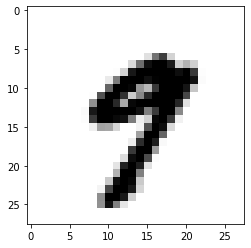

In [13]:
#Input Image for Prediction
img = test_images[20]
import matplotlib.pyplot as plt
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [14]:
train_images = train_images.reshape((60000, 28 *28))
print(train_images.shape)
print(train_images.ndim)
print(train_images.dtype)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28 *28))
print(test_images.shape)
test_images = test_images.astype('float32')/255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[5])
print(train_labels.dtype)
print(train_labels.shape)

(60000, 784)
2
uint8
(10000, 784)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
float32
(60000, 10)


In [15]:
#network.fit(train_images, train_labels, epochs=5, batch_size=128)

# save model and architecture to single file
#network.save('mnist_dense1.h5')

# serialize model to JSON
#json_config = network.to_json()
#with open('mnist_dense1_model.json', 'w') as json_file:
#    json_file.write(json_config)

#test_loss, test_acc = network.evaluate(test_images, test_labels, batch_size=128)
#print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2549 - accuracy: 0.9266
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1040 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0502 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9883


In [8]:
predictions = (models.load_model("mnist_dense1.h5")).predict(test_images)
print(predictions)

[[8.5177296e-09 6.6910963e-11 1.8849263e-06 ... 9.9994254e-01
  9.0830446e-07 9.8004966e-06]
 [1.0703127e-12 2.2307233e-08 1.0000000e+00 ... 1.0924169e-18
  1.5604765e-09 4.2030581e-18]
 [5.0015217e-08 9.9941015e-01 4.3963792e-05 ... 1.7139871e-04
  3.0421608e-04 4.1389026e-07]
 ...
 [1.7859798e-15 1.2268904e-11 9.7543928e-14 ... 1.5900531e-08
  3.1586310e-07 6.7104168e-08]
 [1.0575130e-10 1.7949855e-11 1.9165804e-12 ... 1.7540829e-12
  6.3335050e-05 2.5622401e-14]
 [4.8417112e-12 6.0604758e-15 8.9193840e-11 ... 4.4492147e-18
  6.0218697e-13 1.9985910e-14]]


In [9]:
print(np.argmax(predictions[20]))

9


In [16]:
from google.colab import drive

In [17]:
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!ls /content/drive/MyDrive/*.jpg
img = load_img('/content/drive/My Drive/img_5.jpg', color_mode = "grayscale", target_size=(28, 28))


/content/drive/MyDrive/img_5.jpg  /content/drive/MyDrive/img_6.jpg


In [22]:
# convert to array
img = img_to_array(img, data_format="channels_last", dtype="float32")
img = img / 255.0
img = img.reshape(1,28 * 28)
print(img.shape)

(1, 784)


In [23]:
print((models.load_model("mnist_dense1.h5")).predict_classes(img))

[5]
